In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 58
idxLength = 28
idxGain = 29

In [3]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

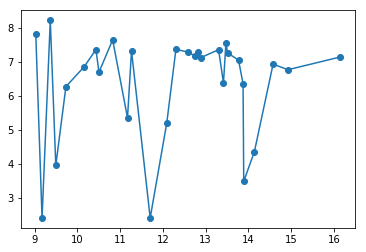

[1.       7.814648 2.407058 8.231338 3.952447 6.276738 6.858591 7.367541
 6.701866 7.653581 5.356639 7.328648 2.407058 5.196359 7.37724  7.292367
 7.177863 7.281025 7.127909 7.362482 6.383764 7.57023  7.271122 7.055415
 6.359582 3.485378 4.358692 6.939541 6.773202 7.14815 ]
[-1.        9.030128  9.176476  9.369069  9.497835  9.734781 10.16031
 10.43655  10.50813  10.82758  11.1751   11.26849  11.70523  12.0921
 12.30744  12.58474  12.75771  12.81668  12.8836   13.30483  13.419
 13.47728  13.5145   13.77129  13.87737  13.89291  14.14219  14.57948
 14.92749  16.14791 ]
Optimal lenght:  6.953631000000001


In [4]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)